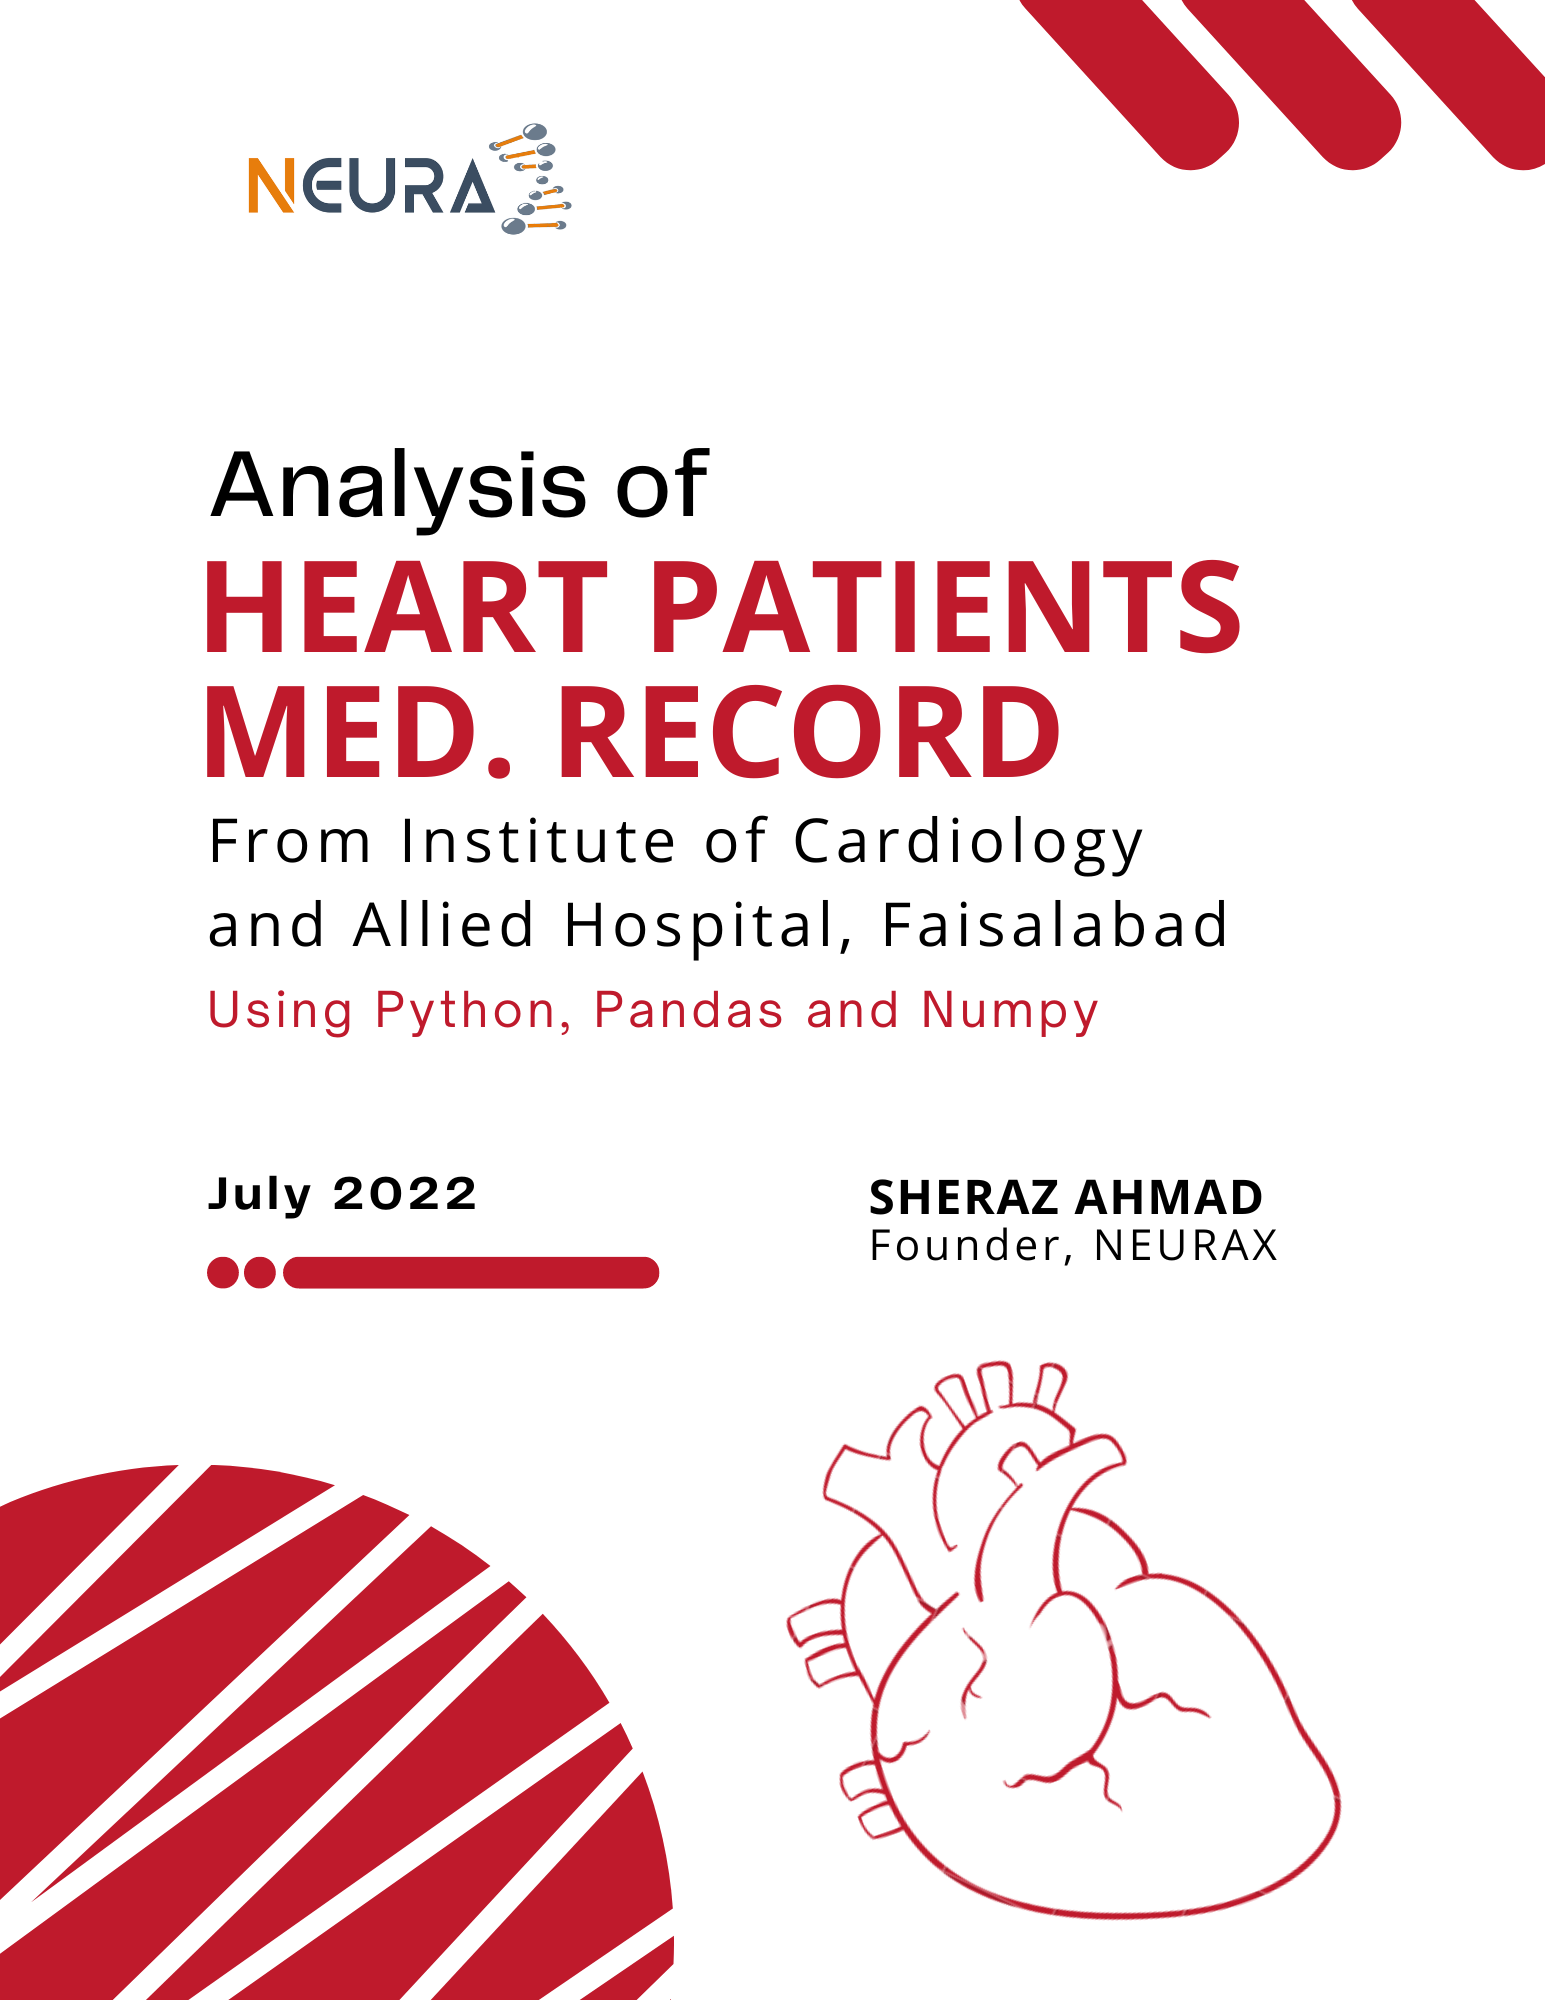

### About the Project

Cardiovascular failure kills aboAn estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke. Heart failure occurs when the heart muscle doesn't pump blood as well as it should. Blood often backs up and causes fluid to build up in the lungs (congest) and in the legs. The fluid buildup can cause shortness of breath and swelling of the legs and feet. In this report, we analyze  a dataset containing the medical records of 299 heart failure patients collected at the Allied Hospital in Faisalabad and the Faisalabad Institute of Cardiology (Punjab - Pakistan) during the months of April to December in 2015. The graphical representation and visualisation of data using matplotlib and seaborn library in python helps us to easily understand a lot better about the dataset.

### About the Dataset

The dataset consist of attributes which doesn't provide complete information regarding the data recorded, so we have to refer to the another table / websites to see the complete information regarding the attributes column names including measurement units and normal level, if required.

This dataset contains 13 features, which reports clinical, body and lifestyle information of a patient namely Age, Anaemia, High Blood Pressure, Creatinine Phosphokinase (CPK), Diabetes, Ejection Fraction, Sex, Platelets, Serum Creatinine, Serum Sodium, Smoking Habit etc.

You can download the dataset from kaggle by clicking the link below: 

https://jovian.ai/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fandrewmvd%2Fheart-failure-clinical-data

Attributes Information is given at the link below:

https://jovian.ai/outlink?url=https%3A%2F%2Fbmcmedinformdecismak.biomedcentral.com%2Farticles%2F10.1186%2Fs12911-020-1023-5%2Ftables%2F1

###  Downloading Dataset

There are several options for getting the dataset into Jupyter:

* Download the CSV manually and upload it via Jupyter's GUI

* Use the urlretrieve function from the urllib.request to download CSV files from a raw URL

* Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.

Let's check whether the dataset was downloaded into the current working directory using listdir() function from os module.

In [2]:
#import os module to work with directories and files
import os 
#to view the list of files in the dataset
os.listdir()

['.profile',
 '.bash_logout',
 '.bashrc',
 '.ipynb_checkpoints',
 'heart-failure-data-analysis.ipynb',
 '.ipython',
 '.cache',
 'heart_failure_clinical_records_dataset.csv',
 '.jovian',
 '.jupyter',
 '.local',
 '.npm',
 '.conda',
 'work',
 '.jovianrc',
 '.git',
 '.config',
 '.wget-hsts']

### Data Preparation and Cleaning

Now we are going to load the CSV file of our data using the Pandas library. we'll store the raw dataset into a variable that will be our initial data frame. Then we'll filter, clean and modify to prepare a data frame ready for analysis.

In [3]:
import pandas as pd

In [4]:
#creating a data frame from CSV file
raw_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [8]:
raw_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Now, let's modify and clean our raw data frame using numpy library . We'll modify our raw data frame by dropping unnecessary columns / rows, renaming the column names, changing the data type of column and so on.

In [5]:
import numpy as np

In [6]:
#renaming DEATH_EVENT as patient_dead for my convenience 
raw_df.rename(columns = {'DEATH_EVENT':'patient_dead'}, inplace = True)
#drop the time column which is not necessary for our analysis 
raw_df.drop(['time'],axis=1, inplace =True, errors = 'ignore')
#changing the data type of age column from float to int
raw_df.age = raw_df.age.astype(int)
#changing the data type of following columns to bool type for our convenience 
raw_df[['anaemia','diabetes','high_blood_pressure', 'smoking', 'patient_dead']] = raw_df[['anaemia','diabetes', 'high_blood_pressure', 'smoking', 'patient_dead']].astype(bool)
#changing the value of sex column to male or female
raw_df['sex'] = np.where(raw_df['sex'] == 1, 'Male','Female')
#to convert the platelet-count into kilo-platelets/mcL 
raw_df.platelets = (raw_df. platelets/1000).astype(int)
raw_df 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,61,True,38,True,155,1.1,143,Male,True,False
295,55,False,1820,False,38,False,270,1.2,139,Female,False,False
296,45,False,2060,True,60,False,742,0.8,138,Female,False,False
297,45,False,2413,False,38,False,140,1.4,140,Male,True,False


In [7]:
#checking is their any null value in dataset
raw_df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
patient_dead                False
dtype: bool

Looks like our dataset is okay and did'nt have any null value.
Now, let's have a helicopter view of our data by using info() and describe() method.

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    bool   
 11  patient_dead              299 non-null    bool   
dtypes: bool(5), float64(1), int64(5), object(1)
memory usage: 17.9+ KB


From the above output, we can clearly see that there are 299 rows and 12 column and there's no null value. Also we can see the data types of each column in the data frame.

In [13]:
raw_df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,581.839465,38.083612,263.327759,1.39388,136.625418
std,11.894997,970.287881,11.834841,97.805105,1.03451,4.412477
min,40.000000,23.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850.000000,9.40000,148.000000


describe() function is used to find some basic statistical information regarding a data frame in pandas. 
It's normal that, the maximum age of patient recorded is 95 years and minmum age is 40 years. All other numeric value records found okay, but the maximum value of Creatinine Phosphokinase (CPK) measured is 7861, that's too high for a normal person. The maximum value of CKP found in a heart failure patient was around 600 micrograms per liter. 

In [16]:
raw_df[raw_df.creatinine_phosphokinase > 1000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 297
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       36 non-null     int64  
 1   anaemia                   36 non-null     bool   
 2   creatinine_phosphokinase  36 non-null     int64  
 3   diabetes                  36 non-null     bool   
 4   ejection_fraction         36 non-null     int64  
 5   high_blood_pressure       36 non-null     bool   
 6   platelets                 36 non-null     int64  
 7   serum_creatinine          36 non-null     float64
 8   serum_sodium              36 non-null     int64  
 9   sex                       36 non-null     object 
 10  smoking                   36 non-null     bool   
 11  patient_dead              36 non-null     bool   
dtypes: bool(5), float64(1), int64(5), object(1)
memory usage: 2.4+ KB


The normal value of CPK ranges from 10 to 120 micrograms per liter, but around 36 patients has CPK level more than 1000 micrograms per liter in our observation. Since, we are not sure about the source of error or that the recorded data is correct or not. This error and huge difference in value might be due to the different measurement units. So let's drop that column and not include in our analysis.

In [9]:
#The axis parameter specifies the direction along which a particular method or function is applied in a DataFrame. axis=0 represents the function is applied column-wise, and axis=1 means that the function is applied row-wise on the DataFrame.
raw_df.drop('creatinine_phosphokinase', inplace = True, axis = 1, errors = 'ignore')

In [10]:
#checking the column names
raw_df.columns

Index(['age', 'anaemia', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'patient_dead'],
      dtype='object')

In [11]:
#looks like we have cleaned our raw dataset. now let's have a copy of it.
heart_failure_df = raw_df.copy()

column names of the data frame doesn't provide complete information regarding the data recorded, so we have to refer to the another table for reference to see the complete information regarding the column names like explanation and measurement units. Also we have to add normal level value for the attributes, for the required column values.

In [12]:
#to save the html table as pandas data frame 
attribute_details_df = pd.read_html("https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1 ")[0]

In [39]:
attribute_details_df

,Feature,Explanation,Measurement,Range
0,Age,Age of the patient,Years,"[40,..., 95]"
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean,"0, 1"
2,High blood pressure,If a patient has hypertension,Boolean,"0, 1"
3,Creatinine phosphokinase,Level of the CPK enzyme in the blood,mcg/L,"[23,..., 7861]"
4,(CPK),NaN,NaN,NaN
5,Diabetes,If the patient has diabetes,Boolean,"0, 1"
6,Ejection fraction,Percentage of blood leaving,Percentage,"[14,..., 80]"
7,NaN,the heart at each contraction,NaN,NaN
8,Sex,Woman or man,Binary,"0, 1"
9,Platelets,Platelets in the blood,kiloplatelets/mL,"[25.01,..., 850.00]"


In [13]:
#to drop the unnecessary column
attribute_details_df.drop('Range', axis =1,inplace = True, errors='ignore' )
#to drop the unnecessary rows
attribute_details_df.drop([3,4,7,13], axis = 0, inplace =True, errors ='ignore')
#to rename the column names
attribute_details_df.columns = ['feature', 'explanation', 'measurement_unit']
attribute_details_df 

,feature,explanation,measurement_unit
0,Age,Age of the patient,Years
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean
2,High blood pressure,If a patient has hypertension,Boolean
5,Diabetes,If the patient has diabetes,Boolean
6,Ejection fraction,Percentage of blood leaving,Percentage
8,Sex,Woman or man,Binary
9,Platelets,Platelets in the blood,kiloplatelets/mL
10,Serum creatinine,Level of creatinine in the blood,mg/dL
11,Serum sodium,Level of sodium in the blood,mEq/L
12,Smoking,If the patient smokes,Boolean


In [14]:
attribute_details_df = attribute_details_df.reindex([0,1,5,6,2,9,10,11,8,12,14])
attribute_details_df.feature = heart_failure_df.columns

In [15]:
#setting the feature column as index
attribute_details_df.set_index(['feature'], inplace =True)

In [16]:
#changing the details in explanation column 
attribute_details_df['explanation']['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'patient_dead'] = ['True, if the patient has Anaemia',
                                                                                                                                                      'True, if the patient has Diabetes', 
                                                                                                                                                      '% of blood leaving the heart at each contraction', 
                                                                                                                                                      'True, if the patient has High blood pressure', 
                                                                                                                                                      'Amount of platelets in the blood', 
                                                                                                                                                      'Male or Female',
                                                                                                                                                      'True, if the patient smokes', 
                                                                                                                                                      'True, if the patient died during the follow-up period'] 


In [17]:
#changing the details in measurement unit column 
attribute_details_df.measurement_unit['sex', 'platelets','serum_creatinine','serum_sodium'] = ['Boolean',
                                                                                            'kilo-platelets / mcL (microliter)', 
                                                                                            'mg/dL (milligrams per deciliter)', 
                                                                                            'mEq/L (milliequivalents per litre)'
                                                                                            ]
#let's add another column to mention normal values of the attributes 
attribute_details_df["normal_value"] = ['None', 
                                     'None', 
                                     'None',
                                     '55% - 70%',
                                     'None', 
                                     '150 - 400 kilo-platelets / mcL', 
                                     '0.6 - 1.2 mg/dL', 
                                     '135 - 145 mEq /L', 
                                     'None', 'None', 'None'
                                    ] 
attribute_details_df

,explanation,measurement_unit,normal_value
feature,,,
age,Age of the patient,Years,None
anaemia,"True, if the patient has Anaemia",Boolean,None
diabetes,"True, if the patient has Diabetes",Boolean,None
ejection_fraction,% of blood leaving the heart at each contraction,Percentage,55% - 70%
high_blood_pressure,"True, if the patient has High blood pressure",Boolean,None
platelets,Amount of platelets in the blood,kilo-platelets / mcL (microliter),150 - 400 kilo-platelets / mcL
serum_creatinine,Level of creatinine in the blood,mg/dL (milligrams per deciliter),0.6 - 1.2 mg/dL
serum_sodium,Level of sodium in the blood,mEq/L (milliequivalents per litre),135 - 145 mEq /L
sex,Male or Female,Boolean,None


Now our dataset for attribute details and heart failure data frame is cleaned and prepared for analysis. Let's check some basic information regarding our cleaned datasets before proceeding for visualisation methods.


In [18]:
heart_failure_df.describe()

,age,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,38.083612,263.327759,1.39388,136.625418
std,11.894997,11.834841,97.805105,1.03451,4.412477
min,40.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,80.000000,850.000000,9.40000,148.000000


In [19]:
attribute_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, age to patient_dead
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   explanation       11 non-null     object
 1   measurement_unit  11 non-null     object
 2   normal_value      11 non-null     object
dtypes: object(3)
memory usage: 652.0+ bytes


In [75]:
#taking sample from data
heart_failure_df.sample(4)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
45,50,False,True,38,False,310,1.9,135,Male,True,True
274,60,True,True,30,False,150,1.0,137,Male,True,False
183,75,False,False,38,True,224,2.5,134,Male,False,True
250,50,False,False,30,True,404,0.5,139,Female,False,False


### Data Analysis and Visualization

Data visualization is the practice of translating information into a visual context, such as a map or graph, to make data easier for the human brain to understand and pull insights from. The main goal of data visualization is to make it easier to identify patterns, trends and outliers in large data sets.
Now let's analyze some of the data and then represent the data through graphs, charts and plots.

#### Number of Patients with Smoking Habit 

In [63]:
heart_failure_df.smoking.value_counts()

False    203
True      96
Name: smoking, dtype: int64

#### Gender Distribution

In [25]:
gender_count = heart_failure_df.sex.value_counts()
gender_count

Male      194
Female    105
Name: sex, dtype: int64

#### Number of Patients with Abnormal Sodium level in the blood

In [29]:
attribute_details_df.normal_value['serum_sodium']

'135 - 145 mEq /L'

In [38]:
abnormal_sodium_level = heart_failure_df[(heart_failure_df.serum_sodium < 135) | (heart_failure_df.serum_sodium > 145)]
print("There are {} patients with abnormal level of sodium in their blood.".format(abnormal_sodium_level['serum_sodium'].count()))

There are 85 patients with abnormal level of sodium in their blood.


#### Death rate of patients

In [65]:
heart_failure_df.patient_dead.value_counts()

False    203
True      96
Name: patient_dead, dtype: int64

#### Number of patients with Diabetes

In [66]:
heart_failure_df.diabetes.value_counts()

False    174
True     125
Name: diabetes, dtype: int64

#### Number of patients with high blood pressure

In [68]:
heart_failure_df.high_blood_pressure.value_counts()

False    194
True     105
Name: high_blood_pressure, dtype: int64

#### Number of Patients with Abnormal Platelets Count

In [21]:
#normal value
attribute_details_df.normal_value['platelets']

'150 - 400 kilo-platelets / mcL'

In [22]:
abnormal_platelets = heart_failure_df[(heart_failure_df.platelets <150) | (heart_failure_df.platelets > 400)].count()
abnormal_platelets

age                    47
anaemia                47
diabetes               47
ejection_fraction      47
high_blood_pressure    47
platelets              47
serum_creatinine       47
serum_sodium           47
sex                    47
smoking                47
patient_dead           47
dtype: int64

The normal value of Platelets Count ranges from 150 - 400 kilo-platelets / mcL. Here, we found that there are 47 patients with abnormal Platelets Count.

Now, let's install and import "seaborn" library as "sns" and "matplotlib.pyplot" module as "plt" to perform some visualization operations on our data frame.

In [23]:
#installing matplotlib and seaborn 
!pip install matplotlib seaborn --upgrade --quiet 

#importing seaborn and matplotlib.pyplot 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
#default style for our graphs
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

#### Death Rate Distribution

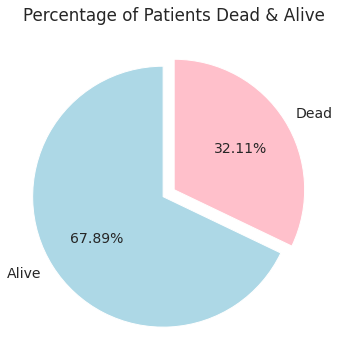

In [58]:
#died patients
dead_count = heart_failure_df.patient_dead.value_counts()
plt.figure(figsize = (12, 6))
plt.pie(dead_count, labels = ["Alive", "Dead"], autopct = '%.2f%%', startangle = 90, colors = ['lightblue', 'pink'], explode=[0.1, 0],)
plt.title("Percentage of Patients Dead & Alive");

As we can clearly see that, the percentage of patients died during the follow-up period is 32.11% which is quite below to that of alive patients which is 67.89%. This might be because of a fact that we only have the data of 8 months  and more number of patients might have died after this period which isn't recorded.

#### Death ratio with respect to Gender

As we already analyze the death rate. Now let's have a look at how the death rate varies with respect to patients gender. Let's use 'countplot' function from seaborn library to visualize.

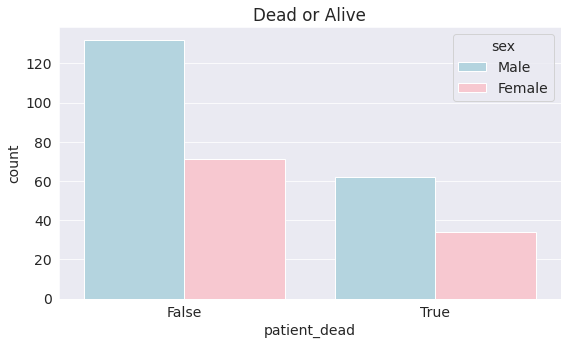

In [57]:
plt.title('Dead or Alive')
plt.xlabel('Patient Dead')
plt.ylabel('Number of Patients');
sns.countplot(x = heart_failure_df.patient_dead, hue = heart_failure_df.sex, palette = ['lightblue', 'pink']);

We can conclude from the above output, though we have more number of male patients, the proportion of male and female patients died during the follow-up period is almost equal.



#### Age Distribution

Let's create a histogram for age distribution analysis of patients in our dataset.

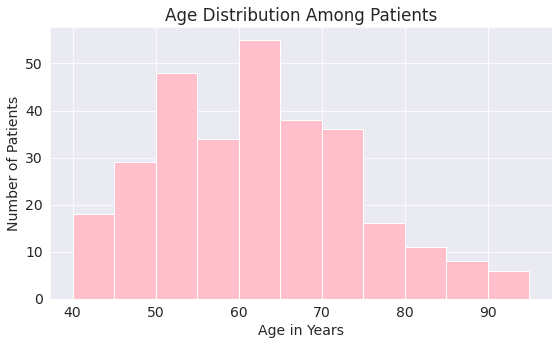

In [62]:
plt.title("Age Distribution Among Patients")
plt.xlabel("Age in Years")
plt.ylabel("Number of Patients")
plt.hist(heart_failure_df.age, bins = np.arange(40,100, 5), color = 'pink');

so, it;s clear from the above analysis that most of patients falls under 60-65 age group and 50-55 age group. If we go back in 2015, the life average expectancy of pakistani was about 67 years. It's obvious that the number of patients recorded starts declining from 65-70 age group. 

#### Sex (Gender)

The distribution of gender of the Heart Failure patients is another crucial factor to look at. Let's visualize the gender distribution using pie chart.

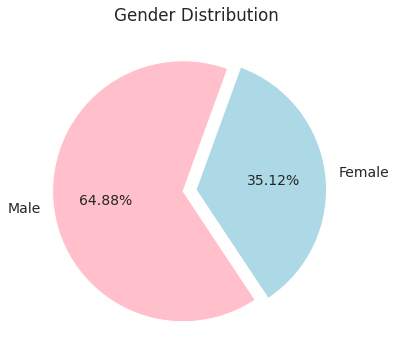

In [60]:
plt.figure(figsize=(12, 6))
plt.pie(gender_count, labels = gender_count.index, autopct ='%.2f%%', startangle = 70, explode = [0.1, 0], colors = ['pink', 'lightblue'])
plt.title("Gender Distribution");

As we can clearly see, 64.88% of the heart failure patients were male in our observation. This means that we have less number of female patients when compared to males in the dataset. So, we can easily say that this dataset is slightly imbalanced.

#### Pair wise relationship

A pairs plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented in Python!

The idea behind pair plot is to understand the relationship between the variables present in the data.

Let's separate numeric columns from the dataset to apply 'pairplot' function to understand the relationship between the different attributes.

In [78]:
#columns with numeric value
numeric_column = heart_failure_df[['age', 'sex', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]

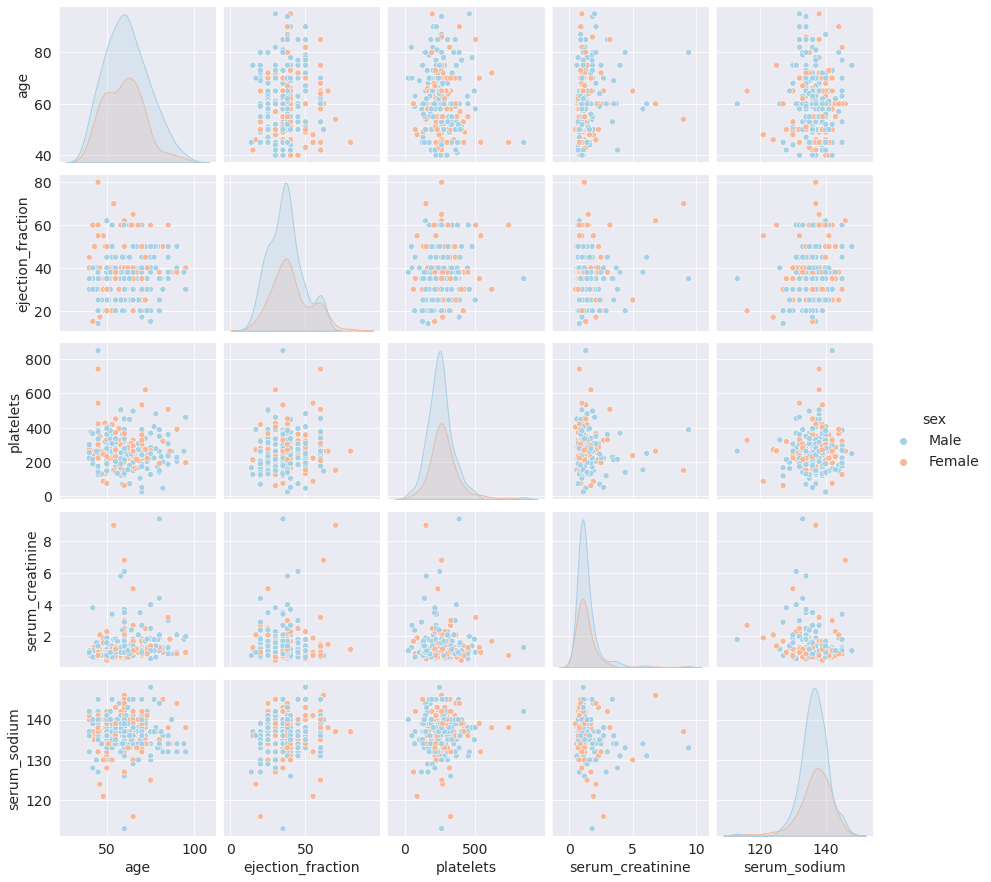

In [83]:
sns.pairplot(numeric_column, hue = 'sex', palette='RdBu_r');

By using 'pairplot' function, we can easily understand and visualize the relationship between the different variables. For example, from the above output we found that only a few patients has normal creatinine and sodium level.

#### Distribution of Ejection Fraction


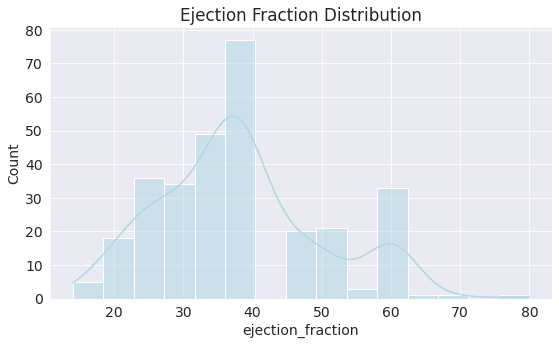

In [88]:
sns.histplot(heart_failure_df.ejection_fraction, kde = True, color = 'lightblue')
plt.title("Ejection Fraction Distribution");

#### Distribution of Platelets Counts

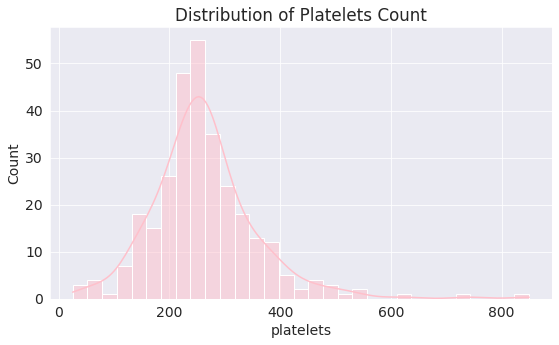

In [89]:
plt.title("Distribution of Platelets Count") 
sns.histplot(heart_failure_df.platelets, kde = True, color ='pink');

#### Distribution of Sodium level 

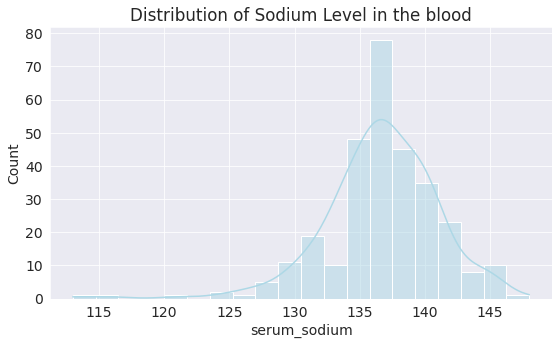

In [90]:
plt.title("Distribution of Sodium Level in the blood") 
sns.histplot(heart_failure_df.serum_sodium, kde = True, color ='lightblue');

It is clear that no value are normally distributed now that we have shown distribution plots for the platelet count, creatinine level, sodium level, and ejection fraction. Platelet count, Ejection Fraction, Creatinine Level, and Sodium Level are all out of whack. In order to get better outcomes from the machine learning models after we train them, we may need to make certain adjustments if the data skewness is higher.

### Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

* Based on the recorded patients gender, we can infer that the dataset is slightly imbalanced, since only 35.1% of Patients were Female.
* We have more number of patients under 60-65 age group and the next place goes to 50-55 age group. And the number of patients recorded starts declining from 65-70 age group, it's obvious since the life expectancy of a person in Pakistan in 2015 was approximately 67 years.
* 32.1% of patients died during the follow-up period. This might be because the data mentioned in our data frame corresponds to only the certain period of time (April'15 - December'15) and more number of patients might have died after this period (which isn't recorded).
* Maximum patients died (during the follow-up period is) under 60-65 age group (i.e 15 Patients). It's obvious, since we have more number of patients in 60-65 age group. And the proportion of patients died starts increasing from 65-70 age group and the number of patients died is more than alive patients in the age group of 80-85, 85-90 and 90-95. This is because over the time, the body’s immune system naturally becomes less capable of handling new threats, such as viruses including novel corona virus. This increases the risk of having issues with various illnesses which ultimately leads to their end.
* The proportion of male and female patients died during the follow-up period is almost equal (i.e ~32%).
* The abnormality in Ejection Fraction(EF) is the most common factor among the heart failure patients. Abnormal Ejection Fraction is followed by the abnormal creatinine and sodium level in the blood respectively, the factor which is least common among the heart failure patients is abnormal Platelets Count (i.e only 47 Patients).
* No medical record values have been normally distributed. Platelets count, Ejection Fraction and Creatinine Level are right skewed and Sodium Level is left skewed.
* The most common abnormality or disease among the heart failure patients is Ejection Fraction and 261 Patients had abnormal Ejection Fraction.
* The least common abnormality or disease among the heart failure patients is Abnormal Platelets Count and 47 Patients had abnormal Platelets Count.
* Though they had normal ejection fraction and normal creatinine level in the blood, some patients with smoking habit died. So, we can conclude that the smoking habit has little impact on the life expectancy of a heart failure patient.


### References and Future work

Check out the following resources to learn more about the dataset, attributes and tools used in this notebook:

Heart Failure Clinical Records Dataset in Kaggle: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Advanced study in Heart Failure Patients Dataset: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

Attributes Information Table: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1

Ejection Fraction: https://my.clevelandclinic.org/health/articles/16950-ejection-fraction

Platelets: https://www.ucsfhealth.org/medical-tests/platelet-count

Serum Creatinine: https://www.medicinenet.com/creatinine_blood_test/article.htm

Serum Sodium: https://www.healthcheckup.com/general/normal-sodium-levels-in-blood/


#### Future Work


Utilizing information on heart failure patients acquired from throughout the globe, analyse the most prevalent factor among patients to support our conclusions.
Based on their abnormalities and disease, ascertain the number of patients who passed away. As an illustration, consider the number of patients who died from anaemia, diabetes, abnormal ejection fraction, high blood pressure, and abnormal creatinine levels.
Learn more about the connections between clinical records like "Ejection Fraction" and "Creatinine Level" by doing further research on them.
Through the use of machine learning algorithms, estimate the life expectancy of patients with heart failure.

#### Follow us on

* Facebook

https://www.facebook.com/profile.php?id=100047568214054

* Linkedin

https://www.linkedin.com/in/sheraz-baloch

* Twitter

https://twitter.com/Sherax139

* website

https://neurax.ltd/


In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>